<a href="https://colab.research.google.com/github/MPGarg/Assignment-13/blob/main/EVA8_Assigment_13_Part_2_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
from __future__ import print_function
import torch.optim as optim
from torchvision import datasets, transforms
import torch
import torch.nn.functional as F
import torchvision
#from torchsummary import summary
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
#!pip install -U albumentations
!pip install torch_lr_finder -q
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch_lr_finder import LRFinder

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Import files from GIT Hub

In [3]:
!git clone https://github.com/RashiTech/main_repo.git

Cloning into 'main_repo'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 167 (delta 8), reused 0 (delta 0), pack-reused 148
Receiving objects: 100% (167/167), 48.80 KiB | 1.88 MiB/s, done.
Resolving deltas: 100% (90/90), done.


# VAE class is imported

In [4]:
from main_repo.models import vae
from main_repo.models.vae import cVAE

# Import Other fuctions

In [5]:
from main_repo import train_test, utils
from main_repo.utils import *
from main_repo.train_test import *

# Assign device

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [7]:
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

[INFO] Couldn't find torchinfo... installing it.


In [8]:
from torchsummary import summary
view_model = cVAE((1, 28, 28), 10, nhid = 2, ncond = 16,device=device).to(device)
#summary(view_model, input_size=(1,28,28))
view_model

cVAE(
  (encoder): Encoder(
    (encode): Sequential(
      (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
      (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (14): Flatten()
      (15): MLP(
    

# Dataset

In [17]:
# Download Mnist data
train_set_mnist = torchvision.datasets.MNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

test_set_mnist = torchvision.datasets.MNIST(
    root='./data'
    ,train=False
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

100%|██████████| 9912422/9912422 [00:00<00:00, 109898525.66it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 20986779.94it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27489065.00it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21697640.97it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [18]:
from torch.utils.data import Dataset
class mnist_ds(Dataset):
  def __init__(self, imageset):
    self.imageset = imageset

  def __getitem__(self, index):

    image = self.imageset[index][0]
    label = self.imageset[index][1]

    if np.random.randn() > 0.5:
        label = np.random.randint(0,10)

    return image, label

  def __len__(self):
    return len(self.imageset)

In [19]:
#Instantiate Train & test classes
mnist_train = mnist_ds(train_set_mnist)
mnist_test = mnist_ds(test_set_mnist)

In [20]:
train_loader = torch.utils.data.DataLoader(
    mnist_train,
    batch_size=512, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    mnist_test,
    batch_size=25)

# VAE

In [21]:
learning_rate = 1e-3
num_epochs = 20
model = cVAE((1, 28, 28), 10, nhid = 2, ncond = 16,device=device).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss(reduction = "sum")

In [22]:
model_tr1, train_losses1 = fit_model_vae(
                                          model=model,
                                          device=device,
                                          trainloader=train_loader,
                                          criterion = criterion,
                                          EPOCHS=20,
                                          optimizer=optimizer,
                                          scheduler=None
                                            )


EPOCH: 1 (LR: 0.001)


100%|██████████| 118/118 [00:23<00:00,  5.07it/s]



Average Training Loss=233.52903427734375

EPOCH: 2 (LR: 0.001)


100%|██████████| 118/118 [00:15<00:00,  7.66it/s]



Average Training Loss=177.84206256510416

EPOCH: 3 (LR: 0.001)


100%|██████████| 118/118 [00:15<00:00,  7.82it/s]



Average Training Loss=166.1343123860677

EPOCH: 4 (LR: 0.001)


100%|██████████| 118/118 [00:14<00:00,  8.06it/s]



Average Training Loss=159.2391448404948

EPOCH: 5 (LR: 0.001)


100%|██████████| 118/118 [00:14<00:00,  7.91it/s]



Average Training Loss=155.53579384765624

EPOCH: 6 (LR: 0.001)


100%|██████████| 118/118 [00:14<00:00,  7.99it/s]



Average Training Loss=152.6840883951823

EPOCH: 7 (LR: 0.001)


100%|██████████| 118/118 [00:15<00:00,  7.62it/s]



Average Training Loss=150.344774609375

EPOCH: 8 (LR: 0.001)


100%|██████████| 118/118 [00:14<00:00,  7.89it/s]



Average Training Loss=148.26826910807293

EPOCH: 9 (LR: 0.001)


100%|██████████| 118/118 [00:14<00:00,  7.93it/s]



Average Training Loss=146.5745034830729

EPOCH: 10 (LR: 0.001)


100%|██████████| 118/118 [00:14<00:00,  8.00it/s]



Average Training Loss=145.14371591796876

EPOCH: 11 (LR: 0.001)


100%|██████████| 118/118 [00:15<00:00,  7.64it/s]



Average Training Loss=144.17279329427083

EPOCH: 12 (LR: 0.001)


100%|██████████| 118/118 [00:14<00:00,  8.04it/s]



Average Training Loss=143.56282454427082

EPOCH: 13 (LR: 0.001)


100%|██████████| 118/118 [00:14<00:00,  8.02it/s]



Average Training Loss=142.56510970052082

EPOCH: 14 (LR: 0.001)


100%|██████████| 118/118 [00:14<00:00,  8.10it/s]



Average Training Loss=141.89107041015626

EPOCH: 15 (LR: 0.001)


100%|██████████| 118/118 [00:15<00:00,  7.84it/s]



Average Training Loss=141.34395966796876

EPOCH: 16 (LR: 0.001)


100%|██████████| 118/118 [00:15<00:00,  7.81it/s]



Average Training Loss=140.87651419270833

EPOCH: 17 (LR: 0.001)


100%|██████████| 118/118 [00:15<00:00,  7.87it/s]



Average Training Loss=140.45737490234376

EPOCH: 18 (LR: 0.001)


100%|██████████| 118/118 [00:14<00:00,  8.04it/s]



Average Training Loss=140.11415846354166

EPOCH: 19 (LR: 0.001)


100%|██████████| 118/118 [00:14<00:00,  8.02it/s]



Average Training Loss=139.87040138346353

EPOCH: 20 (LR: 0.001)


100%|██████████| 118/118 [00:15<00:00,  7.66it/s]


Average Training Loss=139.36614853515624


# Generate Image

In [23]:
number = 9
with torch.no_grad():
    x = model.generate(number)

In [24]:
from matplotlib import pyplot as plt
from matplotlib import cm

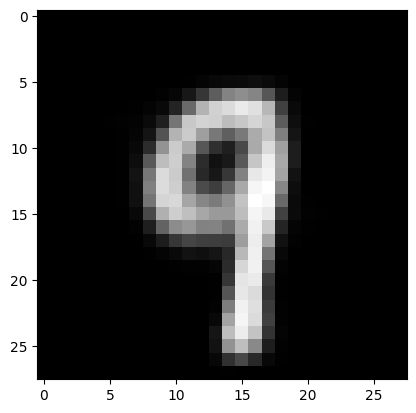

In [25]:
plt.imshow(x.squeeze(0).cpu().numpy(), cm.gray)

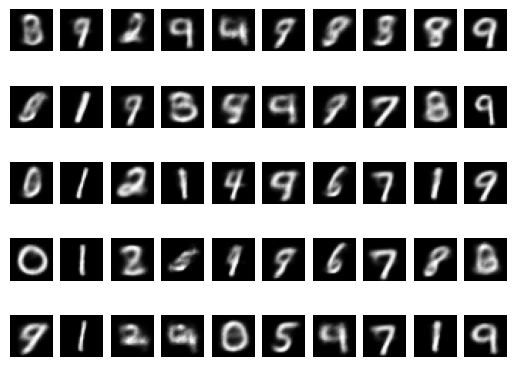

In [26]:
with torch.no_grad():
    x = model.generate(torch.tensor([list(range(10))] * 5).clone().view(-1))

for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.axis("off")
    plt.imshow(x[i].squeeze(0).cpu().numpy(), cm.gray)

# Incorrect Labels

In [27]:
dataiter = iter(test_loader)
data_next = next(dataiter)
images, labels = data_next

In [28]:
labels_1 = []
for i in labels:
    incorrect_label = torch.randint(low=0, high=10, size=(1,)).item()
    while incorrect_label == i:
        incorrect_label = torch.randint(low=0, high=10, size=(1,)).item()
    labels_1.append(incorrect_label)

In [29]:
labels_c = torch.IntTensor(labels_1)
images, labels_c = images.to(device), labels_c.to(device)
with torch.no_grad():
    X_hat1, _,_ = model(images, labels_c)

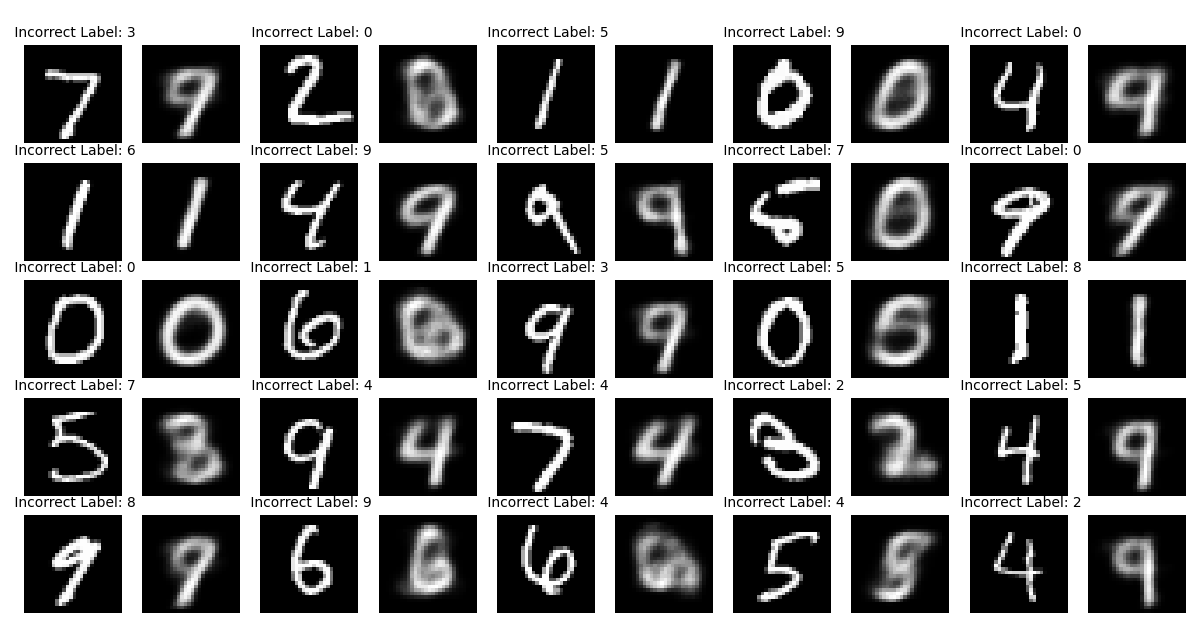

In [30]:
j = 0
fig = plt.figure(figsize=(15,15))
for i in range(25):
    lbl_corr = labels[i]
    img_corr = images[i]
    img_new = X_hat1[i]
    lbl_new = labels_c[i]
    j = j+1
    ax = fig.add_subplot(10, 10,j )
    ax.axis("off")
    ax.imshow(img_corr.squeeze(0).cpu().numpy(), cm.gray)
    ax.set_title(f'\n Incorrect Label: {lbl_new.detach()}',fontsize=10)
    j = j+1
    ax = fig.add_subplot(10, 10, j)
    ax.axis("off")
    ax.imshow(img_new.squeeze(0).cpu().detach().numpy(), cm.gray)